# Crimes in India - Capstone Project- Continued

# Phase 3

#### SQL Operations

Note: Create a separate table for each file and give a meaningful name.

When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.



#### 3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [73]:
import pyodbc
import pandas as pd


In [2]:
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client 11.0',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)']

In [3]:
conn = pyodbc.connect(
Trusted_Connection ='Yes',
Driver = '{ODBC Driver 17 for SQL Server}',
Server = 'LENOVO\SQLEXPRESS',
Database = 'test_capstone'
)

cursor = conn.cursor()

In [5]:
df1 = pd.read_csv('C:\\Users\\suven\\OneDrive\\Desktop\\Data Trained\\Capstone Project\\India_Crime\\District\\42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [6]:
df1.head()

,StateUT,District,Year,Rape,KidnappingAbduction,DowryDeaths,AssaultonWomenIntenttoOutrageherModesty,InsulttoModesty,CrueltybyHusbandorhisRelatives,ImportationofGirls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [7]:
df1.dtypes

StateUT                                    object
District                                   object
Year                                        int64
Rape                                        int64
KidnappingAbduction                         int64
DowryDeaths                                 int64
AssaultonWomenIntenttoOutrageherModesty     int64
InsulttoModesty                             int64
CrueltybyHusbandorhisRelatives              int64
ImportationofGirls                          int64
dtype: object

In [8]:
df1.columns

Index(['StateUT', 'District', 'Year', 'Rape', 'KidnappingAbduction',
       'DowryDeaths', 'AssaultonWomenIntenttoOutrageherModesty',
       'InsulttoModesty', 'CrueltybyHusbandorhisRelatives',
       'ImportationofGirls'],
      dtype='object')

In [11]:
a = "CREATE TABLE df1_distt_crimes_against_women(StateUT nvarchar(50),District nvarchar(50),Year int, Rape int, KidnappingAbduction int, DowryDeaths int, AssaultonWomenIntenttoOutrageherModesty int, InsulttoModesty int, CrueltybyHusbandorhisRelatives int, ImportationofGirls int)"

In [12]:
cursor.execute(a)

In [13]:
for row in df1.itertuples():
    cursor.execute('''INSERT INTO test_capstone.dbo.df1_distt_crimes_against_women(StateUT,District,Year, Rape, KidnappingAbduction, DowryDeaths, AssaultonWomenIntenttoOutrageherModesty, InsulttoModesty, CrueltybyHusbandorhisRelatives, ImportationofGirls)
    VALUES(?,?,?,?,?,?,?,?,?,?)''', row.StateUT, row.District, row.Year, row.Rape, row.KidnappingAbduction, row.DowryDeaths, row.AssaultonWomenIntenttoOutrageherModesty, row.InsulttoModesty, row.CrueltybyHusbandorhisRelatives, row.ImportationofGirls)
    
conn.commit()

In [14]:
cursor.execute("SELECT * FROM df1_distt_crimes_against_women")

In [15]:
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 50, 30, 16, 149, 34, 175, 0)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 23, 30, 7, 118, 24, 154, 0)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 27, 34, 14, 112, 83, 186, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 20, 20, 17, 126, 38, 57, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 23, 26, 12, 109, 58, 247, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 1, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 54, 51, 7, 139, 129, 378, 0)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 37, 39, 24, 118, 27, 746, 0)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 56, 49, 62, 414, 81, 224, 0)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 47, 30, 17, 180, 336, 172, 0)
('ANDHRA PRADESH', 'KRISHNA', 2001, 37, 21, 10, 208, 72, 265, 0)
('ANDHRA PRADESH', 'KURNOOL', 2001, 29, 47, 13, 141, 107, 92, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 59, 27, 14, 176, 41, 69, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 35, 20, 26, 100, 25, 192, 0)
('ANDHRA PRADESH', 'NALGONDA', 2001, 35, 19, 31, 188, 59, 214, 0)
('AN

#### 3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [67]:
b = "SELECT StateUT, District, Year,SUM(Rape) Rape,SUM(KidnappingAbduction) Kidnapping FROM df1_distt_crimes_against_women GROUP BY StateUT, District, Year ORDER BY SUM(RAPE) DESC, SUM(KidnappingAbduction) DESC"

In [68]:
cursor.execute(b)

In [69]:
for row in cursor:
    print(row)

('MADHYA PRADESH', 'TOTAL', 2012, 3425, 1127)
('MADHYA PRADESH', 'TOTAL', 2011, 3406, 1088)
('MADHYA PRADESH', 'TOTAL', 2010, 3135, 1030)
('MADHYA PRADESH', 'TOTAL', 2007, 3010, 701)
('MADHYA PRADESH', 'TOTAL', 2009, 2998, 841)
('MADHYA PRADESH', 'TOTAL', 2008, 2937, 736)
('MADHYA PRADESH', 'TOTAL', 2005, 2921, 604)
('MADHYA PRADESH', 'TOTAL', 2006, 2900, 617)
('MADHYA PRADESH', 'TOTAL', 2002, 2891, 639)
('MADHYA PRADESH', 'TOTAL', 2004, 2875, 584)
('MADHYA PRADESH', 'TOTAL', 2001, 2851, 668)
('MADHYA PRADESH', 'TOTAL', 2003, 2738, 608)
('WEST BENGAL', 'TOTAL', 2011, 2363, 3711)
('WEST BENGAL', 'TOTAL', 2009, 2336, 2187)
('WEST BENGAL', 'TOTAL', 2010, 2311, 2764)
('WEST BENGAL', 'TOTAL', 2008, 2263, 1907)
('WEST BENGAL', 'TOTAL', 2007, 2106, 1590)
('RAJASTHAN', 'TOTAL', 2012, 2049, 2697)
('WEST BENGAL', 'TOTAL', 2012, 2046, 4168)
('UTTAR PRADESH', 'TOTAL', 2011, 2042, 7525)
('UTTAR PRADESH', 'TOTAL', 2012, 1963, 7910)
('UTTAR PRADESH', 'TOTAL', 2001, 1958, 2879)
('UTTAR PRADESH', 'TOTA

#### 3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [74]:
c ="SELECT StateUT, District, Year,SUM(Rape) Rape,SUM(KidnappingAbduction) Kidnapping FROM df1_distt_crimes_against_women GROUP BY StateUT, District, Year ORDER BY SUM(RAPE), SUM(KidnappingAbduction)"

In [75]:
cursor.execute(c)

In [76]:
for row in cursor:
    print(row)

('A & N ISLANDS', 'NICOBAR', 2001, 0, 0)
('A & N ISLANDS', 'NICOBAR', 2003, 0, 0)
('A & N ISLANDS', 'NICOBAR', 2004, 0, 0)
('A & N ISLANDS', 'NICOBAR', 2005, 0, 0)
('A & N ISLANDS', 'NICOBAR', 2006, 0, 0)
('A & N ISLANDS', 'NICOBAR', 2008, 0, 0)
('A & N ISLANDS', 'NICOBAR', 2009, 0, 0)
('A & N ISLANDS', 'NICOBAR', 2011, 0, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2004, 0, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2008, 0, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2009, 0, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2011, 0, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001, 0, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2002, 0, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2003, 0, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2004, 0, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2005, 0, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2007, 0, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2009, 0, 0)
('ANDHRA PRADESH', 'VIJAYAWADA RLY.', 2003, 0, 0)
('ANDHRA PRADESH',

#### 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [22]:
df2 = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Data Trained\\Capstone Project\\India_Crime\\District\\02_District_wise_crimes_committed_against_ST_2001_2012.csv")

In [23]:
df2.head()

,StateUT,DISTRICT,Year,Murder,Rape,KidnappingAbduction,Dacoity,Robbery,Arson,Hurt,ProtectionofCivilRightsAct,PreventionofatrocitiesAct,OtherCrimesAgainstSTs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14


In [24]:
df2.dtypes

StateUT                       object
DISTRICT                      object
Year                           int64
Murder                         int64
Rape                           int64
KidnappingAbduction            int64
Dacoity                        int64
Robbery                        int64
Arson                          int64
Hurt                           int64
ProtectionofCivilRightsAct     int64
PreventionofatrocitiesAct      int64
OtherCrimesAgainstSTs          int64
dtype: object

In [25]:
df2.columns

Index(['StateUT', 'DISTRICT', 'Year', 'Murder', 'Rape', 'KidnappingAbduction',
       'Dacoity', 'Robbery', 'Arson', 'Hurt', 'ProtectionofCivilRightsAct',
       'PreventionofatrocitiesAct', 'OtherCrimesAgainstSTs'],
      dtype='object')

In [26]:
d = "CREATE TABLE df2_distt_crimes_against_ST(StateUT nvarchar(50), DISTRICT nvarchar(50), Year int, Murder int, Rape int, KidnappingAbduction int,Dacoity int, Robbery int, Arson int, Hurt int,ProtectionofCivilRightsAct int, PreventionofatrocitiesAct int,OtherCrimesAgainstSTs int)"

In [27]:
cursor.execute(d)

In [28]:
for row in df2.itertuples():
    cursor.execute('''INSERT INTO test_capstone.dbo.df2_distt_crimes_against_ST(StateUT,DISTRICT,Year, Murder,Rape, KidnappingAbduction, Dacoity, Robbery, Arson, Hurt, ProtectionofCivilRightsAct,PreventionofatrocitiesAct,OtherCrimesAgainstSTs)
    VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)''', row.StateUT, row.DISTRICT, row.Year, row.Murder, row.Rape, row.KidnappingAbduction, row.Dacoity, row.Robbery, row.Arson, row.Hurt,row.ProtectionofCivilRightsAct, row.PreventionofatrocitiesAct,row.OtherCrimesAgainstSTs)
conn.commit()

In [29]:
cursor.execute("SELECT * FROM df2_distt_crimes_against_ST")

In [30]:
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, 19)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, 2)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, 20)
('ANDHRA PRADESH', 'KRISHNA', 2001, 0, 0, 1, 0, 0, 0, 6, 0, 24, 18)
('ANDHRA PRADESH', 'KURNOOL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 1, 1, 0, 0, 0, 0, 6, 0, 11, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 0, 1, 0, 0, 0, 1, 0, 0, 4, 3)
('ANDHRA PRADESH', 'NALGONDA', 2001, 

#### 3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

In [35]:
e = "SELECT TOP 1 DISTRICT,SUM(Dacoity) Dacoity,SUM(Robbery) Robbery FROM df2_distt_crimes_against_ST GROUP BY DISTRICT ORDER BY SUM(Dacoity) DESC, SUM(Robbery) DESC"

In [36]:
cursor.execute(e)

In [37]:
for row in cursor:
    print(row)

('TOTAL', 206, 398)


#### 3.6	Write SQL query to find in which districts(All) the lowest number of murders happened

In [39]:
f ="SELECT District, SUM(Murder) Murder FROM df2_distt_crimes_against_ST GROUP BY District ORDER BY SUM(Murder)"

In [40]:
cursor.execute(f)

In [41]:
for row in cursor:
    print(row)

('NEW DELHI', 0)
('NORTH', 0)
('BIKANER', 0)
('AIZAWL', 0)
('SANT KABIRNAGAR', 0)
('BOUDH', 0)
('CID', 0)
('CRIME JAMMU', 0)
('MAHOBA', 0)
('SAHARSA', 0)
('KOLLAM', 0)
('G.R.P', 0)
('PAURI GARHWAL', 0)
('MAHENDRAGARH', 0)
('CID CRIME', 0)
('SUBANSIRI LOWER', 0)
('PATAN', 0)
('ARWAL', 0)
('ERNAKULAM COMMR.', 0)
('VIRUDHUNAGAR', 0)
('BAREILLY', 0)
('SOLAPUR COMMR.', 0)
('THOUBAL', 0)
('UTTAR DINAJPUR', 0)
('AURANGABAD', 0)
('J.P.NAGAR', 0)
('MALDA', 0)
('AKOLA', 0)
('BARAMULLA', 0)
('BOKARO', 0)
('UKHRUL', 0)
('VARANASI', 0)
('G.R.P.(RLY)', 0)
('HANDWARA', 0)
('SHOPIAN', 0)
('KUTCH (WEST-BHUJ)', 0)
('KAMENG EAST', 0)
('BORDER', 0)
('GARO HILLS WEST', 0)
('NASIK COMMR.', 0)
('NAGAPATTINAM', 0)
('VIJAYAWADA RLY.', 0)
('KAITHAL', 0)
('MUMBAI', 0)
('FAIZABAD', 0)
('JAGATSINGHPUR', 0)
('SBS NAGAR', 0)
('MUZAFFARPUR RLY.', 0)
('MEHSANA', 0)
('CHENGAI', 0)
('CBPURA', 0)
('BHADRAK', 0)
('NORTH EAST', 0)
('SAS NGR', 0)
('THRISSUR COMMR.', 0)
('THRISSUR RURAL', 0)
('PANCHSHIL NAGAR', 0)
('RAJAHMUN

#### 3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.

In [42]:
g = "SELECT DISTRICT, Year, SUM(Murder) Murder FROM df2_distt_crimes_against_ST GROUP BY DISTRICT, Year ORDER BY SUM(Murder)"

In [43]:
cursor.execute(g)

In [44]:
for row in cursor:
    print(row)

('GHAZIABAD', 2002, 0)
('MAU', 2004, 0)
('KURUKSHETRA', 2005, 0)
('CUDDAPAH', 2006, 0)
('AWANTIPORA', 2006, 0)
('JAUNPUR', 2010, 0)
('DARBHANGA', 2012, 0)
('KISHANGANJ', 2012, 0)
('BELLARY', 2012, 0)
('BANKURA', 2001, 0)
('LAKHIMPUR', 2005, 0)
('HANDWARA', 2005, 0)
('BULDHANA', 2005, 0)
('PATHANAMTHITTA', 2007, 0)
('JAMMU', 2009, 0)
('CP LUDHIANA', 2010, 0)
('KHIRI', 2012, 0)
('BIDAR', 2001, 0)
('AURAIYA', 2002, 0)
('KALAHANDI', 2003, 0)
('KOTA', 2004, 0)
('TRIVANDRUM RURAL', 2006, 0)
('DHEMAJI', 2008, 0)
('ANJAW', 2012, 0)
('ALIRAJPUR', 2012, 0)
('CHHATARPUR', 2002, 0)
('FEROZEPUR', 2002, 0)
('CHAMPAWAT', 2002, 0)
('KURNOOL', 2005, 0)
('TUMKUR', 2005, 0)
('GWALIOR', 2008, 0)
('CENTRAL', 2008, 0)
('SOLAPUR COMMR.', 2010, 0)
('D and N HAVELI', 2010, 0)
('NOWRANGPUR', 2012, 0)
('ETAH', 2001, 0)
('PALI', 2002, 0)
('CRIME SRINAGAR', 2004, 0)
('PURNEA', 2005, 0)
('VALSAD', 2005, 0)
('SONIPAT', 2009, 0)
('SOLAN', 2009, 0)
('C.I.D.', 2012, 0)
('JAGRAON', 2003, 0)
('NAVSARI', 2010, 0)
('KAUSHA

#### 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [105]:
df3 = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Data Trained\\Capstone Project\\India_Crime\\District\\01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [46]:
df3.head()

,StateUT,DISTRICT,YEAR,MURDER,ATTEMPTtoMURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [47]:
df3.dtypes

StateUT                                                object
DISTRICT                                               object
YEAR                                                    int64
MURDER                                                  int64
ATTEMPTtoMURDER                                         int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               int64
RAPE                                                    int64
CUSTODIAL RAPE                                          int64
OTHER RAPE                                              int64
KIDNAPPING & ABDUCTION                                  int64
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS             int64
KIDNAPPING AND ABDUCTION OF OTHERS                      int64
DACOITY                                                 int64
PREPARATION AND ASSEMBLY FOR DACOITY                    int64
ROBBERY                                                 int64
BURGLARY                                                int64
THEFT   

In [48]:
df3.columns

Index(['StateUT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPTtoMURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [57]:
h = "CREATE TABLE df3_distt_crimes_IPC(StateUT nvarchar(50), DISTRICT nvarchar(50), YEAR int, MURDER int,ATTEMPTtoMURDER int, RAPE int)"

In [58]:
cursor.execute(h)

In [59]:
for row in df3.itertuples():
    cursor.execute('''INSERT INTO test_capstone.dbo.df3_distt_crimes_IPC(StateUT,DISTRICT,YEAR, MURDER,ATTEMPTtoMURDER,RAPE) VALUES(?,?,?,?,?,?)''', row.StateUT, row.DISTRICT, row.YEAR, row.MURDER, row.ATTEMPTtoMURDER,row.RAPE)
conn.commit()

In [60]:
cursor.execute("SELECT * FROM df3_distt_crimes_IPC")

In [61]:
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 50)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 23)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 27)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 20)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 23)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 182, 88, 54)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 111, 113, 37)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 162, 85, 56)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 93, 60, 47)
('ANDHRA PRADESH', 'KRISHNA', 2001, 65, 51, 37)
('ANDHRA PRADESH', 'KURNOOL', 2001, 133, 72, 29)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 157, 67, 59)
('ANDHRA PRADESH', 'MEDAK', 2001, 101, 56, 35)
('ANDHRA PRADESH', 'NALGONDA', 2001, 122, 60, 35)
('ANDHRA PRADESH', 'NELLORE', 2001, 89, 69, 46)
('ANDHRA PRADESH', 'NIZAMABAD', 2001, 106, 49, 21)
('ANDHRA PRADESH', 'PRAKASHAM', 2001, 102, 82, 19)
('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214, 95, 72)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.

#### 3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.



In [100]:
i = "SELECT StateUT, YEAR,DISTRICT, MURDER FROM (SELECT StateUT, YEAR,DISTRICT, MURDER,ROW_NUMBER() OVER(PARTITION BY StateUT,YEAR ORDER BY MURDER DESC) AS RANK FROM df3_distt_crimes_IPC) AS ranked_data WHERE rank =1"

In [101]:
cursor.execute(i)

In [102]:
for row in cursor:
    print(row)

('A & N ISLANDS', 2001, 'TOTAL', 13)
('A & N ISLANDS', 2002, 'TOTAL', 17)
('A & N ISLANDS', 2003, 'TOTAL', 21)
('A & N ISLANDS', 2004, 'TOTAL', 15)
('A & N ISLANDS', 2005, 'ANDAMAN', 14)
('A & N ISLANDS', 2006, 'TOTAL', 4)
('A & N ISLANDS', 2007, 'A and N ISLANDS', 15)
('A & N ISLANDS', 2008, 'ANDAMAN', 8)
('A & N ISLANDS', 2009, 'ANDAMAN', 15)
('A & N ISLANDS', 2010, 'TOTAL', 9)
('A & N ISLANDS', 2011, 'ANDAMAN', 14)
('A & N ISLANDS', 2012, 'TOTAL', 15)
('ANDHRA PRADESH', 2001, 'TOTAL', 2602)
('ANDHRA PRADESH', 2002, 'TOTAL', 2525)
('ANDHRA PRADESH', 2003, 'TOTAL', 2667)
('ANDHRA PRADESH', 2004, 'TOTAL', 2579)
('ANDHRA PRADESH', 2005, 'TOTAL', 2750)
('ANDHRA PRADESH', 2006, 'TOTAL', 2766)
('ANDHRA PRADESH', 2007, 'TOTAL', 2665)
('ANDHRA PRADESH', 2008, 'TOTAL', 2690)
('ANDHRA PRADESH', 2009, 'TOTAL', 2449)
('ANDHRA PRADESH', 2010, 'TOTAL', 2538)
('ANDHRA PRADESH', 2011, 'TOTAL', 2808)
('ANDHRA PRADESH', 2012, 'TOTAL', 2717)
('ARUNACHAL PRADESH', 2001, 'TOTAL', 83)
('ARUNACHAL PRADESH'

#### 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [103]:
dataframe = pd.read_sql(i, conn)

C:\Users\suven\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [104]:
dataframe

,StateUT,YEAR,DISTRICT,MURDER
0,A & N ISLANDS,2001,TOTAL,13
1,A & N ISLANDS,2002,TOTAL,17
2,A & N ISLANDS,2003,TOTAL,21
3,A & N ISLANDS,2004,TOTAL,15
4,A & N ISLANDS,2005,ANDAMAN,14
...,...,...,...,...
415,WEST BENGAL,2008,TOTAL,1811
416,WEST BENGAL,2009,TOTAL,2068
417,WEST BENGAL,2010,TOTAL,2398
418,WEST BENGAL,2011,TOTAL,2109


#### 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

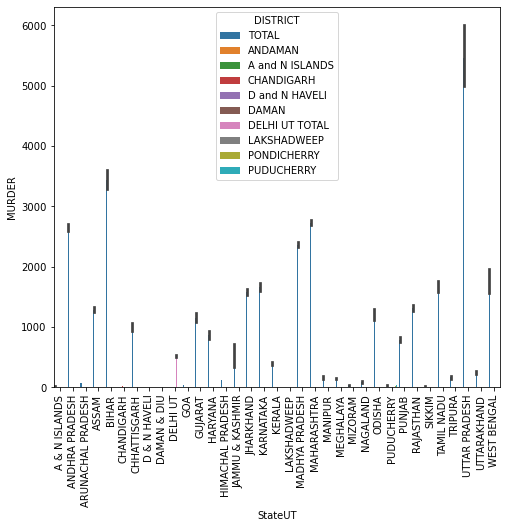

In [99]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot(x= dataframe['StateUT'], y = dataframe['MURDER'], hue =dataframe['DISTRICT'], data = dataframe)
plt.xticks(rotation = 90)
plt.show()

# Phase 4

### Unsupervised ML (Clustering)


Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.


Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.

#### 4.1  Create 3 clusters as below.
- 1. Sensitive Area's
- 2. Moderate Area's
- 3. Peaceful Area's"

In [ ]:
***** Herein, I am reimporting the IPC crimes at district level with the relevant columns; StateUT, DISTRICT, YEAR and TOTAL IPC CRIMES that will be used for the analysis asked in the questions in this phase****

In [107]:
j = "CREATE TABLE df3_distt_crimes_IPC_P4(StateUT nvarchar(50), DISTRICT nvarchar(50), YEAR int, TOTALCRIMES int)"

In [108]:
cursor.execute(j)

In [110]:
for row in df3.itertuples():
    cursor.execute('''INSERT INTO test_capstone.dbo.df3_distt_crimes_IPC_P4(StateUT,DISTRICT,YEAR,TOTALCRIMES) VALUES(?,?,?,?)''', row.StateUT, row.DISTRICT, row.YEAR, row.TOTALCRIMES)
conn.commit()

In [115]:
query = "SELECT * FROM df3_distt_crimes_IPC_P4"

In [118]:
cursor.execute(query)

In [113]:
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 4154)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 4125)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 5818)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 3140)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 6507)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 287)
('ANDHRA PRADESH', 'GUNTUR', 2001, 7848)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 11831)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 5811)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 4582)
('ANDHRA PRADESH', 'KRISHNA', 2001, 4779)
('ANDHRA PRADESH', 'KURNOOL', 2001, 4581)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 4819)
('ANDHRA PRADESH', 'MEDAK', 2001, 3532)
('ANDHRA PRADESH', 'NALGONDA', 2001, 5002)
('ANDHRA PRADESH', 'NELLORE', 2001, 5245)
('ANDHRA PRADESH', 'NIZAMABAD', 2001, 3621)
('ANDHRA PRADESH', 'PRAKASHAM', 2001, 3678)
('ANDHRA PRADESH', 'RANGA REDDY', 2001, 9867)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001, 439)
('ANDHRA PRADESH', 'SRIKAKULAM', 2001, 2572)
('ANDHRA PRADESH', 'VIJAYAWADA', 2001, 6733)
('ANDHRA PRADESH', 'VI

In [116]:
# Craeting a dataframe of the above dataset

dataframe_Phase4 = pd.read_sql(query, conn)

In [117]:
dataframe_Phase4.head()

,StateUT,DISTRICT,YEAR,TOTALCRIMES
0,ANDHRA PRADESH,ADILABAD,2001,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,4125
2,ANDHRA PRADESH,CHITTOOR,2001,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507


In [120]:
# Next I will use K-Means clustering to cluster the data
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [121]:
# Normalize the 'total crimes' column
scaler = MinMaxScaler()
dataframe_Phase4['TOTALCRIMES_Normalized'] = scaler.fit_transform(dataframe_Phase4[['TOTALCRIMES']])


In [123]:
# Select the normalized 'TOTALCRIMES' column
selected_feature = dataframe_Phase4[['TOTALCRIMES_Normalized']]

In [124]:
# Instantiate and fit the K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(selected_feature)

KMeans(n_clusters=3, random_state=42)

In [125]:
# Retrieve the cluster assignments
labels = kmeans.labels_

In [128]:
# Add the cluster labels to the DataFrame
dataframe_Phase4['cluster'] = labels

In [132]:
# Analyze the clusters
sensitive_areas = dataframe_Phase4[dataframe_Phase4['cluster'] == 0]['StateUT']
moderate_areas = dataframe_Phase4[dataframe_Phase4['cluster'] == 1]['StateUT']
peaceful_areas = dataframe_Phase4[dataframe_Phase4['cluster'] == 2]['StateUT']

#### Cluster 0:

In [133]:
# Print the states in each cluster
print("Sensitive areas:")
print(sensitive_areas)
print()

Sensitive areas:
0       ANDHRA PRADESH
1       ANDHRA PRADESH
2       ANDHRA PRADESH
3       ANDHRA PRADESH
4       ANDHRA PRADESH
             ...      
9012       LAKSHADWEEP
9013       LAKSHADWEEP
9014        PUDUCHERRY
9015        PUDUCHERRY
9016        PUDUCHERRY
Name: StateUT, Length: 8772, dtype: object



#### Cluster 1:

In [134]:
print("Moderate areas:")
print(moderate_areas)
print()

Moderate areas:
28      ANDHRA PRADESH
169            GUJARAT
285          KARNATAKA
302             KERALA
351     MADHYA PRADESH
             ...      
8657       MAHARASHTRA
8806         RAJASTHAN
8851        TAMIL NADU
8938     UTTAR PRADESH
8982       WEST BENGAL
Name: StateUT, Length: 119, dtype: object



#### Cluster 2:

In [135]:
# Print the states in each cluster
print("Peaceful areas:")
print(peaceful_areas)
print()

Peaceful areas:
70             ASSAM
115            BIHAR
135     CHHATTISGARH
190          HARYANA
253        JHARKHAND
            ...     
8630     MAHARASHTRA
8734          ODISHA
8763          PUNJAB
8971     WEST BENGAL
8997        DELHI UT
Name: StateUT, Length: 126, dtype: object



#### 4.2  Create DataFrame for each cluster that shows data according to the areas.



In [136]:
# Creating separate DataFrames for each cluster

cluster_dfs = []
for cluster_id in range(3):
    cluster_data = dataframe_Phase4[dataframe_Phase4['cluster'] == cluster_id]
    cluster_dfs.append(cluster_data)

In [137]:
# Analyze and print the data for each cluster
for cluster_id, cluster_df in enumerate(cluster_dfs):
    print(f"Cluster {cluster_id}:")
    print(cluster_df)
    print()

Cluster 0:
             StateUT       DISTRICT  YEAR  TOTALCRIMES  \
0     ANDHRA PRADESH       ADILABAD  2001         4154   
1     ANDHRA PRADESH      ANANTAPUR  2001         4125   
2     ANDHRA PRADESH       CHITTOOR  2001         5818   
3     ANDHRA PRADESH       CUDDAPAH  2001         3140   
4     ANDHRA PRADESH  EAST GODAVARI  2001         6507   
...              ...            ...   ...          ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012           60   
9013     LAKSHADWEEP          TOTAL  2012           60   
9014      PUDUCHERRY       KARAIKAL  2012          787   
9015      PUDUCHERRY     PUDUCHERRY  2012         3494   
9016      PUDUCHERRY          TOTAL  2012         4281   

      TOTALCRIMES_Normalized  cluster  
0                   0.018853        0  
1                   0.018721        0  
2                   0.026405        0  
3                   0.014251        0  
4                   0.029532        0  
...                      ...      ...  
9012        

#### 4.3  "Analyse your clusters and prepare a report that explains all your observations.
Example - 
1. What is impacting more crimes in sensitive areas. 
2. What needs to be done to reduce crime. 
3. Most safe and unsafe districts.
4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

- Herein, I am going to make observations from  the dataset (State as well as District) and the one that I prepared myself for analysis (used in Phase 1)

In [ ]:
#1.What is impacting more crimes in sensitive areas.

According to the analysis done in Phase 1 using visualisation methods, low literacy rate, high unemployment,high poverty and high population lead to increasing crime rate in some areas. 
If literacy is increased, people will become more educated and aware- leading to higher unemployment and hence can fulfil their basic needs. This will lead to reduction in crimes.

In [ ]:
#2. What needs to be done to reduce crime.

 - If literacy is increased, people will become more educated and aware- leading to higher unemployment and hence can fulfil their basic needs. This will lead to reduction in crimes.
 - Also, it was seen in Phase 1 that with every year from 2001-2010, the crime rate dropped. This could be due to better education, more employment opportunities, better support from government and increasing use of social media- making people more informed about the prevalence of crimes and ways to curb them

In [ ]:
# 3. Most safe and unsafe districts.

In [ ]:
# Most safe districts
- TOtal district : Assam, Bihar & Chhatisgarh are the top 3 safe districts
# Most unsafe districts
- Adilabad, Anantapur, Chittor are the top 3 unsafe districts

In [ ]:
# 4.Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

- The maximum crimes take place in the state of Madhya Pradesh and the lowest in Lakshwadeep
- The maximum rapes take place in the state of Madhya Pradesh in the year 2012. 
- The maximum Kidnapping & abduction of women and dowry deaths take place in the state of Uttar Pradesh.
- The graphs made in Phase 1 show the impact of Literacy rate, unemployment, poverty on the crime rate in each state from the year 2000-2010

#### 4.4   Capstone project overall story in your own words. Min 1000 words.



I would take this final question as an opportunity to share my experience , the observations I made and the key learnings I gained from this Capstone projects.

1. Reflect on the Capstone Project journey:
* This part will describe the entire journey of the capstone project, from it's inception to it's completion. This project started was assigned 3 weeks back but, according to me, it's preparation started from the first class with Shankar Sir. The useful concepts he taught, the live examples he quoted and the way he clarified our doubts contributed a lot in this project. The second most useful things was our internship with Flip Robo, which gave an immense understanding of the data and the Machine learning concepts; giving us a flavour of the real corporate world. I am an experienced professional, however, the word 'Capstone project' was an alien term to me. Therefore, before starting the project, I read on google what exactly the term' Capstone project' means. According to google, "A capstone project is a comprehensive and often interdisciplinary academic project that serves as a culmination of a student's learning experience. It is typically undertaken at the end of a degree program, such as a bachelor's or master's degree, and is designed to integrate and apply the knowledge and skills acquired throughout the course of study". Honestly,I was still clueless what was in store for me in this project. This project, not just taught me Data Science related skills but also skills to juggle work with personal life. . At first, I thought of giving up and writing a mail to the institute but I remembered Shankar Sir's words in one of the videos where he said, " Don't give up because this project will make you learn a LOT". I attempted the project fully, gave my best and realised, the more I dig deep into the project, the nearer I get to finding the solutions to the questions. In this process, I started developing more interest and fondness towards this subject. Also, this project was just not about data, excel sheets and python coding. It was much more than that. It was about detailed research, proper judgement, deep analysis, perseverance and most importantly, a positive mindset. This project definitely helped in getting the best out of me.

2. Academic learnings from the project
The project is divided into 4 phases. The project is about the crimes in India. This involves research, collection of data, cleaning it, selection of right features,  analysis of features with the target variable, using SQL queries to create tables, insert data and extracting sub datasets with the given condition. There were some excel files (State and District cimes) provided with the project as well.

- In Phase 1, the data for population, literacy rate and area for each state in India had to be collected. For this, I studied about Census in India which is done every 10 years. Therefore, I used the official indian census website to get data for population, literact rate and area statewise for the year 2001. Apart from these, I additionally collected data for unemployment, poverty , total  crimes count from the official websistes. These were the additional features that I used to study the crime rate in Indian states. From 2001 to 2010, rate of change of population was taken from the internet and used in the final dataset. The Total crime rate was calculated using the formula : Total_crime_count/ Population * 100. Also, the state files for crime information (provided as an attachment) has been used for information about  Total Crimes.

- In Phase 2, I used seaborn and Matplotlib libraries in Python to create charts for analysis of features with other features and with the target variable. Using the plots created, I wrote crime report for each state in India.

- In Phase 3, the district level crime excel files were imported using SQL queries in python. I double checked this task by writing my queries in the SQL Management studio alongside. This helped me enhance my understanding of the SQL code I was using to get the desired results.

- In Phase 4, finally, unsupervised ML concepts were used wherein I used K-Means clustering to create clusters of crime data into sensitive areas, moderate areas and peaceful areas. Further analysis was done of the causes of increasing crimes and ways to curb them.

This was a wholesome project which helped us to use the knowledge that we gained in diffrent areas of Data Science along with the tools and applications we learned. This project required us to know the data from the scratch, understanding the objective and work in a stipulated time. Before starting to work on the excel sheets and Python, I did a lot of research about the relevant topics like census, understanding data points, the right dataset to be collected, different sources to collect data, changing rate/ trending, crime rate calculation etc. This pre-work helped me a lot in answering the questions of this project.

3. Personal growth

- The capstone project helped in enhancing my critical thinking skills. Through in-depth research, analysis, and problem-solving, I have learned to approach complex issues with a strategic mindset.
- It helped me work on time management and instilled a sense of resilience in me- a feeling of bouncing when I felt lost and clueless.
- Lastly, the capstone project has provided me with a deep sense of accomplishment and self-confidence.

4. Token of gratitude:

- In this section, I would like to express my deepest gratitude to 3 persons; Shankar Sir, Harsh (DataTrained Academic Coordinator) and Shwetank (SME,Flip Robo).
- Words will fall short if I start thanking Shankar Sir for the most useful learning he imparted during this whole course. I loved His teaching style and attending his lectures was always so much fun.
- Thank you Harsh for helping me enroll for this course and being always there to handle my questions and understanding my doubts in the most courteous way. You will shine in your career ahead.
- Thank you Shwetank for your prompt responses to my queries and imparting useful learnings during my tenure at Flip Robo

5. Concluding remarks:
- In conclusion, working on my capstone project has been an incredibly rewarding and transformative experience. Throughout this journey, I have gained invaluable knowledge, skills, and personal growth that will shape my future endeavors.It has equipped me with the skills, knowledge, and confidence to tackle future challenges and contribute to my chosen field. I am grateful for this opportunity and enthusiastic about the next chapter of my academic or professional pursuits.


#                                  ........Thank You.......